In [18]:
import pandas as pd
import matplotlib.pylab as plt

# Load dataset

We use UCI HAR Dataset to visulize the signals and
doad following files:
- Names of features : Features.txt
- Training data : X_train.txt
- Label : y_train.txt
- subject : subject_train.txt

## Combine files of training data and feature names
- X_train.txt file without names of features

In [19]:
train_df = pd.read_csv('../Visulize signal/UCI HAR Dataset/train/X_train.txt', delim_whitespace = True)    
train_df.head(5)

2.8858451e-001  -2.0294171e-002  -1.3290514e-001  -9.9527860e-001  \
0        0.278419        -0.016411        -0.123520        -0.998245   
1        0.279653        -0.019467        -0.113462        -0.995380   
2        0.279174        -0.026201        -0.123283        -0.996091   
3        0.276629        -0.016570        -0.115362        -0.998139   
4        0.277199        -0.010098        -0.105137        -0.997335   

   -9.8311061e-001  -9.1352645e-001  -9.9511208e-001  -9.8318457e-001  \
0        -0.975300        -0.960322        -0.998807        -0.974914   
1        -0.967187        -0.978944        -0.996520        -0.963668   
2        -0.983403        -0.990675        -0.997099        -0.982750   
3        -0.980817        -0.990482        -0.998321        -0.979672   
4        -0.990487        -0.995420        -0.997627        -0.990218   

   -9.2352702e-001  -9.3472378e-001  ...  -7.4323027e-002  -2.9867637e-001  \
0        -0.957686        -0.943068  ...         0.158075        -0.595051   
1        -0.977469        -0.938692  ...         0.414503        -0.390748   
2        -0.989302        -0.938692  ...         0.404573        -0.117290   
3        -0.990441        -0.942469  ...         0.087753        -0.351471   
4        -0.995549        -0.942469  ...         0.019953        -0.545410   

   -7.1030407e-001  -1.1275434e-001  3.0400372e-002  -4.6476139e-001  \
0        -0.861499         0.053477       -0.007435        -0.732626   
1        -0.760104        -0.118559        0.177899         0.100699   
2        -0.482845        -0.036788       -0.012892         0.640011   
3        -0.699205         0.123320        0.122542         0.693578   
4        -0.844619         0.082632       -0.143439         0.275041   

   -1.8445884e-002  -8.4124676e-001  1.7994061e-001  -5.8626924e-002  
0         0.703511        -0.844788        0.180289        -0.054317  
1         0.808529        -0.848933        0.180637        -0.049118  
2        -0.485366        -0.848649        0.181935        -0.047663  
3        -0.615971        -0.847865        0.185151        -0.043892  
4        -0.368224        -0.849632        0.184823        -0.042126  

[5 rows x 561 columns]

In [20]:
features = []
with open('../Visulize signal/UCI HAR Dataset/Features.txt') as f:
    for line in f:
        features.append(line.split()[1])
print('# of features : %d, # of unique features' % len(features), len(set(features)))          
features[:5]        

# of features : 561, # of unique features 477


['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y']

## Solve duplicate features

- 重複的feature都是關於bandsEnergy()，並且都有三組Data
- 推論是關於bandsEnergy()的features少了XYZ

In [21]:
df = pd.DataFrame(features, columns=['feature'])
gr = df.feature.value_counts()
gr[gr>1]

fBodyGyro-bandsEnergy()-41,48       3
fBodyAcc-bandsEnergy()-33,40        3
fBodyGyro-bandsEnergy()-1,16        3
fBodyAcc-bandsEnergy()-49,64        3
fBodyAcc-bandsEnergy()-17,32        3
fBodyAccJerk-bandsEnergy()-1,8      3
fBodyGyro-bandsEnergy()-49,56       3
fBodyAcc-bandsEnergy()-41,48        3
fBodyAccJerk-bandsEnergy()-25,32    3
fBodyGyro-bandsEnergy()-25,48       3
fBodyGyro-bandsEnergy()-57,64       3
fBodyAccJerk-bandsEnergy()-9,16     3
fBodyAccJerk-bandsEnergy()-49,56    3
fBodyGyro-bandsEnergy()-17,32       3
fBodyAcc-bandsEnergy()-1,24         3
fBodyAcc-bandsEnergy()-33,48        3
fBodyAccJerk-bandsEnergy()-33,40    3
fBodyGyro-bandsEnergy()-33,48       3
fBodyAcc-bandsEnergy()-9,16         3
fBodyAcc-bandsEnergy()-49,56        3
fBodyAcc-bandsEnergy()-25,48        3
fBodyAccJerk-bandsEnergy()-25,48    3
fBodyAcc-bandsEnergy()-17,24        3
fBodyAccJerk-bandsEnergy()-17,24    3
fBodyAccJerk-bandsEnergy()-1,16     3
fBodyAcc-bandsEnergy()-1,8          3
fBodyGyro-ba

### Fill XYZ about bandsEnergy() features

In [22]:
i = 0
axis = ['X','Y','Z']
change_features = []
for col in features:
    idx_split = col.split('-')
    if (len(idx_split)>2) :
        if idx_split[1] =='bandsEnergy()':
            col = '_'.join(idx_split[0:-1]+[axis[i],idx_split[-1]])
            if (idx_split[2] == '25,48'):
                if axis[i] == 'Z': i=0
                else: i+=1
    change_features.append(col)    
print('# of changeed features : %d, # of unique changeed features' % len(change_features), len(set(change_features)))         
df = pd.DataFrame(change_features, columns=['feature'])
df[df.feature.str.contains('bandsEnergy()')]

# of changeed features : 561, # of unique changeed features 561


/opt/conda/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


feature
302     fBodyAcc_bandsEnergy()_X_1,8
303    fBodyAcc_bandsEnergy()_X_9,16
304   fBodyAcc_bandsEnergy()_X_17,24
305   fBodyAcc_bandsEnergy()_X_25,32
306   fBodyAcc_bandsEnergy()_X_33,40
..                               ...
497  fBodyGyro_bandsEnergy()_Z_17,32
498  fBodyGyro_bandsEnergy()_Z_33,48
499  fBodyGyro_bandsEnergy()_Z_49,64
500   fBodyGyro_bandsEnergy()_Z_1,24
501  fBodyGyro_bandsEnergy()_Z_25,48

[126 rows x 1 columns]

## Combines all files

In [23]:
train_df.columns = change_features
train_df['subject_id'] = pd.read_csv('../Visulize signal/UCI HAR Dataset/train/subject_train.txt', squeeze = True) 
train_df['label'] = pd.read_csv('../Visulize signal/UCI HAR Dataset/train/y_train.txt', squeeze = True)
train_df.head(5)

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.278419          -0.016411          -0.123520         -0.998245   
1           0.279653          -0.019467          -0.113462         -0.995380   
2           0.279174          -0.026201          -0.123283         -0.996091   
3           0.276629          -0.016570          -0.115362         -0.998139   
4           0.277199          -0.010098          -0.105137         -0.997335   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.975300         -0.960322         -0.998807         -0.974914   
1         -0.967187         -0.978944         -0.996520         -0.963668   
2         -0.983403         -0.990675         -0.997099         -0.982750   
3         -0.980817         -0.990482         -0.998321         -0.979672   
4         -0.990487         -0.995420         -0.997627         -0.990218   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.957686         -0.943068  ...                        -0.861499   
1         -0.977469         -0.938692  ...                        -0.760104   
2         -0.989302         -0.938692  ...                        -0.482845   
3         -0.990441         -0.942469  ...                        -0.699205   
4         -0.995549         -0.942469  ...                        -0.844619   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                     0.053477                             -0.007435   
1                    -0.118559                              0.177899   
2                    -0.036788                             -0.012892   
3                     0.123320                              0.122542   
4                     0.082632                             -0.143439   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.732626                              0.703511   
1                          0.100699                              0.808529   
2                          0.640011                             -0.485366   
3                          0.693578                             -0.615971   
4                          0.275041                             -0.368224   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  \
0             -0.844788              0.180289             -0.054317   
1             -0.848933              0.180637             -0.049118   
2             -0.848649              0.181935             -0.047663   
3             -0.847865              0.185151             -0.043892   
4             -0.849632              0.184823             -0.042126   

   subject_id  label  
0           1      5  
1           1      5  
2           1      5  
3           1      5  
4           1      5  

[5 rows x 563 columns]

In [24]:
active_labels = pd.read_csv('../Visulize signal/UCI HAR Dataset/activity_labels.txt', squeeze=True, names=['Label'])    
active_labels

0               1 WALKING
1      2 WALKING_UPSTAIRS
2    3 WALKING_DOWNSTAIRS
3               4 SITTING
4              5 STANDING
5                6 LAYING
Name: Label, dtype: object

## Test

In [25]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import colors as mcolors

import numpy as np


# Visulize signal

## Plot signals by points

In [26]:
def plot_sig_by_point_label(data, labels, columns=None, start_point=None, end_point=None, subjectId=None):

    #data = data.set_index('key')
    colors=['gray','b','g','r','c','m','y','orange','fuchsia']
    labels = labels.tolist()
    labels.insert(0, '0 NO LABEL')
    
    if columns is None: col_loc = range(0, data.columns.get_loc('subject_id'))
    else: col_loc = [data.columns.get_loc(col) for col in columns]
        
    for i in col_loc:

        fig = plt.figure(figsize=(25,5))
        ax1 = plt.subplot(1,1,1)
        plt.title(data.columns[i])
        ax1.locator_params(nbins=20, axis='x')
        
        for j in range(0, len(data.label.unique())):
            
            if subjectId==None:
                conditions = ((data.index >= start_point) & (train_df.index <= end_point))
                
            else:    
                conditions = (data['subject_id']==subjectId)
            if j==0:
                ax1.plot(data[conditions].iloc[:,i], marker='.',
                         color=colors[j], label=labels[j])
            else:
                ax1.plot(data[(data['label']==j) & (conditions)].iloc[:,i],
                     marker='.', color=colors[j], label=labels[j])


        ax1.legend()
        plt.show()

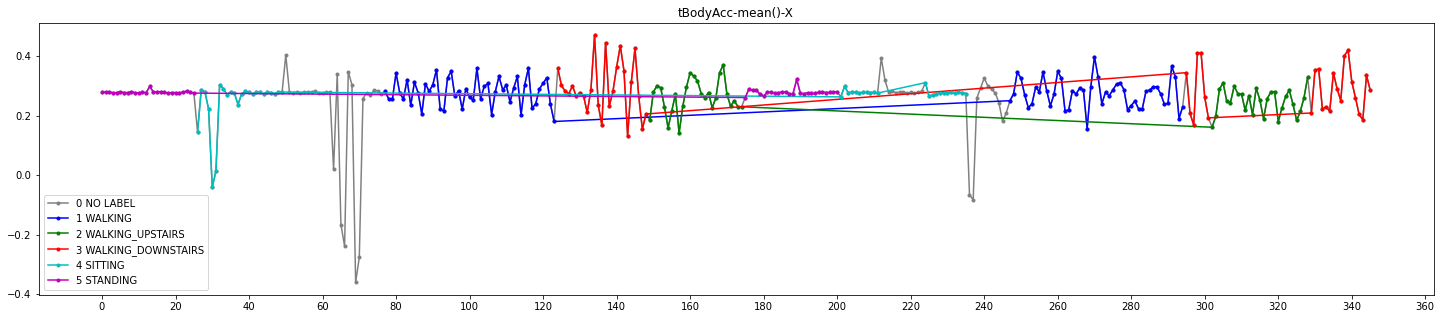

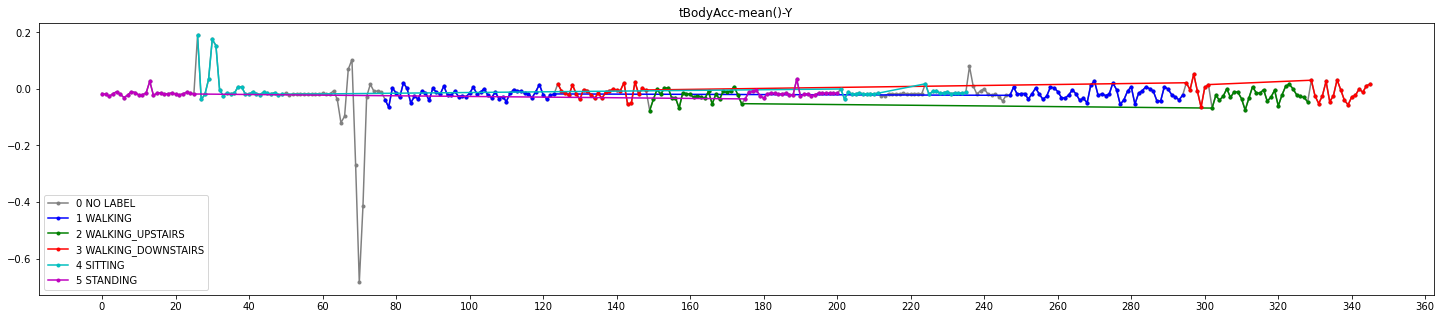

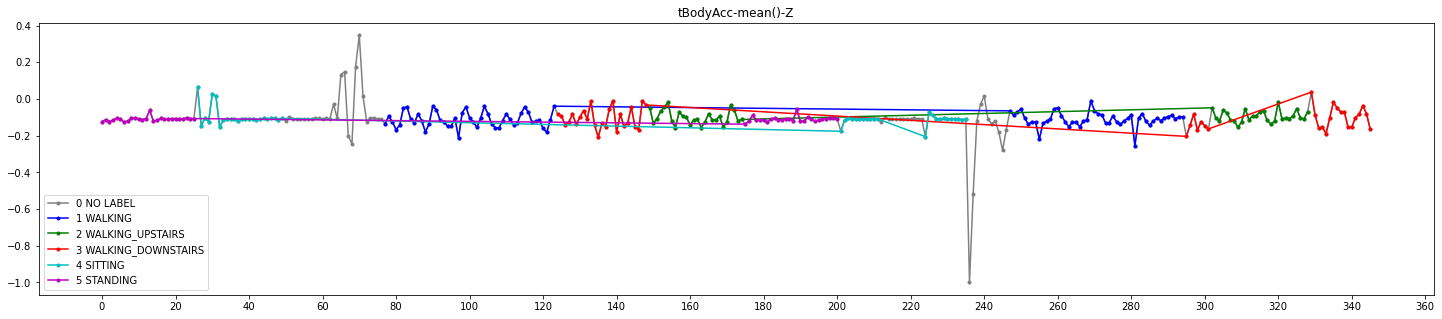

In [27]:
plot_sig_by_point_label(data=train_df, 
                        labels=active_labels,
                        subjectId=1,
                        columns=['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z'],
                        #start_point=280, end_point=600
                       )

## Plot signals by video time

Target : If we want to assist to label data by video of collected data 

### Simulate the time vlaues

- Because no recording time of sensor in UCI HAR Dataset 
- Set 200 ms each window 
- Collect data of different subject at 30 minutes intervals

In [28]:
train_df.loc[:, 'timestamp'] = ''
for i, j in enumerate(train_df.subject_id.unique()):
    conditions = (train_df.subject_id==j)
    train_df.loc[conditions, 'timestamp'] = pd.timedelta_range(start='0 second', periods=len(train_df[conditions])+1, closed='right', freq='200ms')+ np.timedelta64(i, '30m')

print ('Empty timestamp series: %d' % len(train_df[train_df.timestamp=='']))
train_df[['subject_id', 'timestamp']]

Empty timestamp series: 0


subject_id               timestamp
0              1  0 days 00:00:00.200000
1              1  0 days 00:00:00.400000
2              1  0 days 00:00:00.600000
3              1  0 days 00:00:00.800000
4              1         0 days 00:00:01
...          ...                     ...
7346          30  0 days 10:01:15.800000
7347          30         0 days 10:01:16
7348          30  0 days 10:01:16.200000
7349          30  0 days 10:01:16.400000
7350          30  0 days 10:01:16.600000

[7351 rows x 2 columns]

## Create video timestamp to match with time of recoded data

- Set video timestamp based on first window
- Assume that collecting first window was at 15-second of video because the first 15 seconds of video was setting sensors

In [29]:
from datetime import timedelta

train_df.loc[:, 'video_aboutTime'] = train_df.timestamp + timedelta(seconds=30)
train_df.video_aboutTime = pd.to_datetime(train_df.video_aboutTime.values.astype('datetime64[D]')).strftime('%H:%M:%S')
train_df.head(5)

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.278419          -0.016411          -0.123520         -0.998245   
1           0.279653          -0.019467          -0.113462         -0.995380   
2           0.279174          -0.026201          -0.123283         -0.996091   
3           0.276629          -0.016570          -0.115362         -0.998139   
4           0.277199          -0.010098          -0.105137         -0.997335   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.975300         -0.960322         -0.998807         -0.974914   
1         -0.967187         -0.978944         -0.996520         -0.963668   
2         -0.983403         -0.990675         -0.997099         -0.982750   
3         -0.980817         -0.990482         -0.998321         -0.979672   
4         -0.990487         -0.995420         -0.997627         -0.990218   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0         -0.957686         -0.943068  ...   
1         -0.977469         -0.938692  ...   
2         -0.989302         -0.938692  ...   
3         -0.990441         -0.942469  ...   
4         -0.995549         -0.942469  ...   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                             -0.007435                         -0.732626   
1                              0.177899                          0.100699   
2                             -0.012892                          0.640011   
3                              0.122542                          0.693578   
4                             -0.143439                          0.275041   

   angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
0                              0.703511             -0.844788   
1                              0.808529             -0.848933   
2                             -0.485366             -0.848649   
3                             -0.615971             -0.847865   
4                             -0.368224             -0.849632   

   angle(Y,gravityMean)  angle(Z,gravityMean)  subject_id  label  \
0              0.180289             -0.054317           1      5   
1              0.180637             -0.049118           1      5   
2              0.181935             -0.047663           1      5   
3              0.185151             -0.043892           1      5   
4              0.184823             -0.042126           1      5   

                timestamp  video_aboutTime  
0  0 days 00:00:00.200000         00:00:30  
1  0 days 00:00:00.400000         00:00:30  
2  0 days 00:00:00.600000         00:00:30  
3  0 days 00:00:00.800000         00:00:30  
4         0 days 00:00:01         00:00:31  

[5 rows x 565 columns]

In [30]:
[train_df.columns.get_loc(col) for col in ['subject_id', 'label']]

[561, 562]

In [31]:
def plot_sig_by_videoTime_label(data, labels, start_time, end_time, columns=None):
    
    labels = labels.tolist()
    labels.insert(0, '0 NO LABEL')

    data_part = data[(data.video_aboutTime>=start_time)&(data.video_aboutTime<=end_time)].reset_index()
    data_part = data_part.drop(['index'], axis=1)
    data_part.loc[:,'key'] = data_part.index

    #data_part = data_part.set_index('key')
    colors=['gray','b','g','r','c','m','y','orange','fuchsia']
    
    if columns is None: col_loc = range(0, data.columns.get_loc('subject_id'))
    else: col_loc = [data.columns.get_loc(col) for col in columns]
        
    for i in col_loc:
        fig = plt.figure(figsize=(25,5))
        ax1 = plt.subplot(1,1,1)
        plt.title(data_part.columns[i])
        ax1.locator_params(nbins=20, axis='x')
        
        for j in range(len(data.label.unique())):
            if j==0:
                ax1.plot(data_part.iloc[:,i], marker='.', color=colors[j], label=labels[j])
            else:
                ax1.plot(data_part[data_part['label']==j].iloc[:,i],
                     marker='.', color=colors[j], label=labels[j])
        # Set scond x-axis
        ax2 = ax1.twiny()
        ax2_values = data_part.groupby(['video_aboutTime']).first()['key']
        
        ### set same xlim(x_board), ax2 xlim not from 0 to len(data)
        ax2.set_xlim(ax1.get_xlim())
        ax2.set_xticks(ax2_values)
        ax2.set_xticklabels(ax2_values.index, fontsize=12)

        ax2.xaxis.set_ticks_position('bottom') # set the position of the second x-axis to bottom
        ax2.xaxis.set_label_position('bottom') # set the position of the second x-axis to bottom
        ax2.spines['bottom'].set_position(('outward', 36))
        
        ax1.legend()
        plt.show()

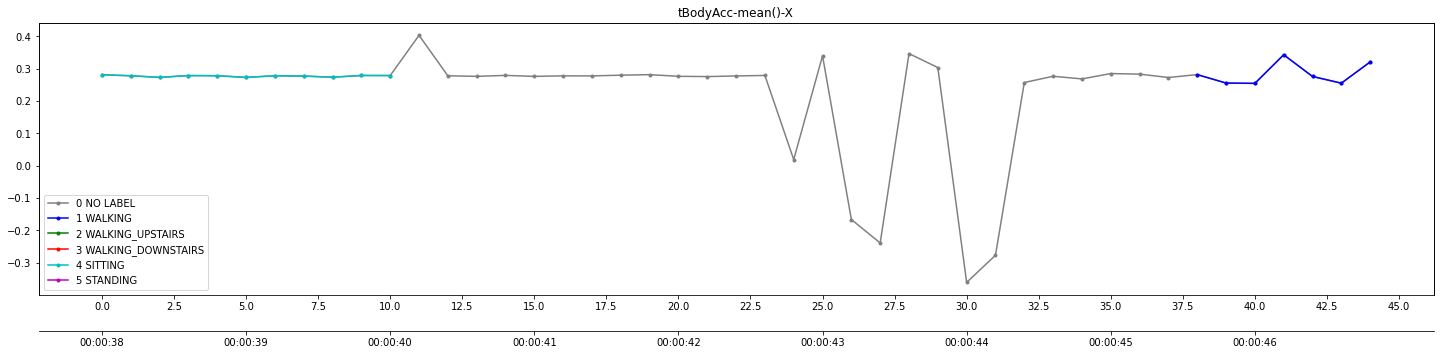

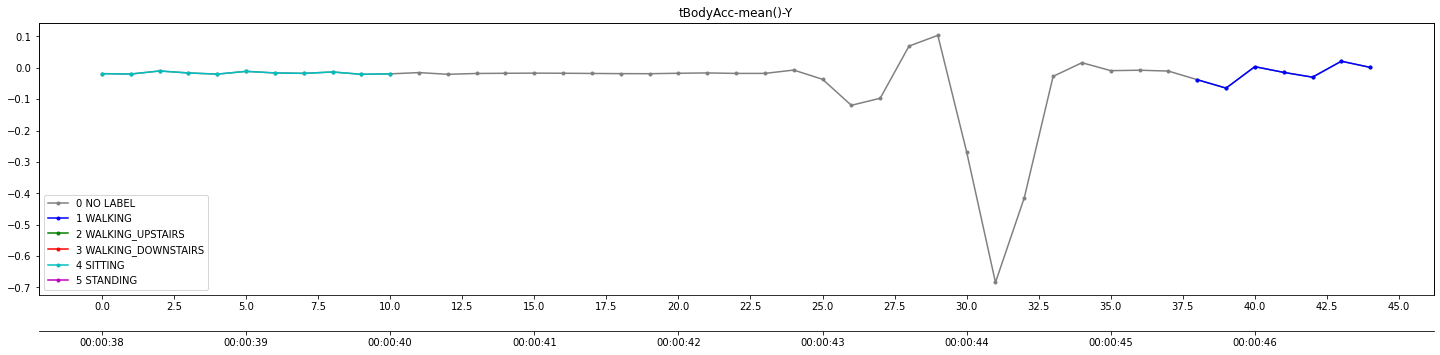

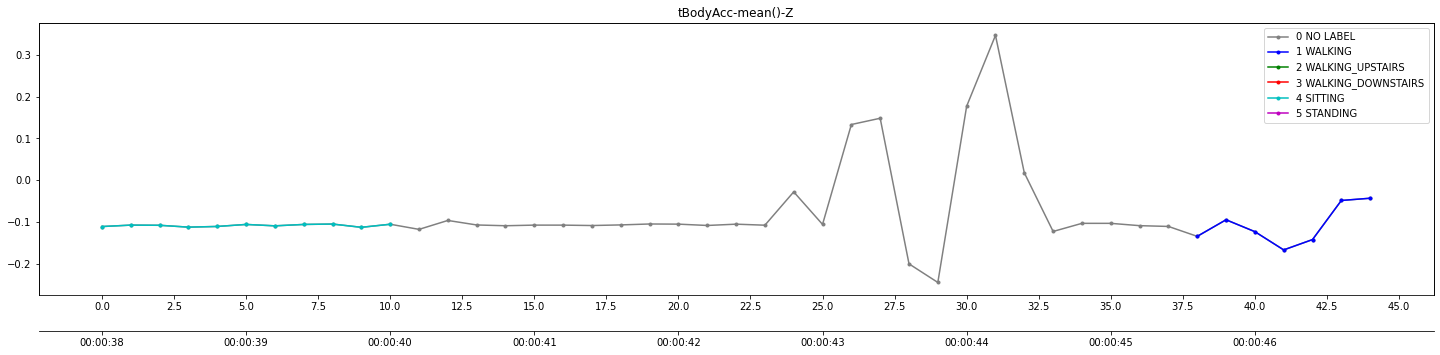

In [32]:
plot_sig_by_videoTime_label(data=train_df, 
                            labels=active_labels,
                            columns=['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z'],
                            start_time='00:00:38', 
                            end_time='00:00:46')

# Label data

In [33]:
def label_signal(data, start_point, end_point, label, columns=None):
    active_labels = pd.read_csv('../Visulize signal/UCI HAR Dataset/activity_labels.txt', squeeze=True, names=['Label'])    

    if label in range(0, len(train_df.label.unique())+1):
        data.loc[start_point-1:end_point, 'label'] = label 
        data.to_csv('datalabeled.csv', index=False)
        plot_sig_by_point_label(data=data, columns=columns, labels=active_labels, start_point=start_point-10, end_point=end_point+10)
        return data
    else:
        print ('Error label! (permit range 1~%d)'% len(train_df.label.unique()))

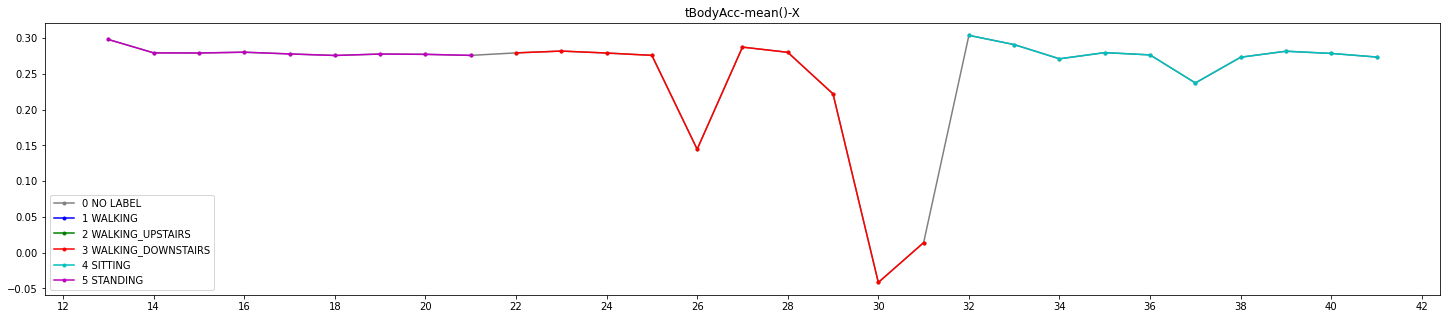

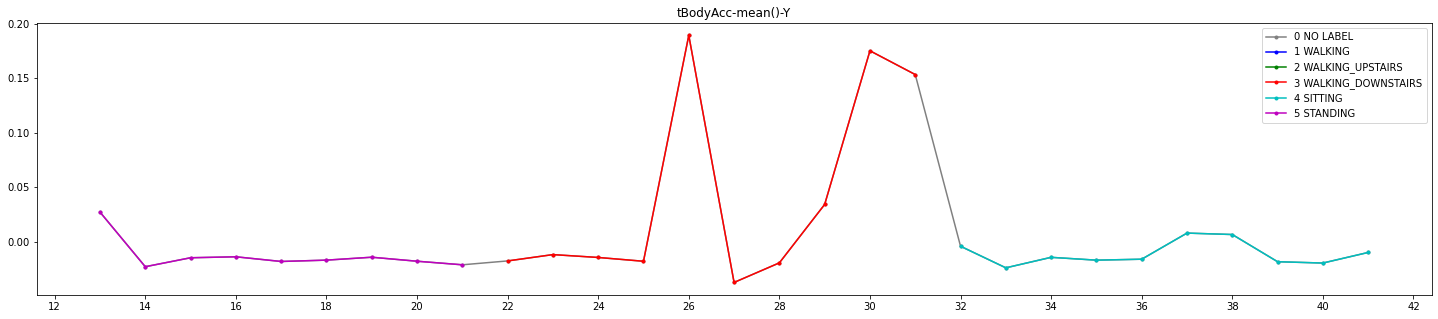

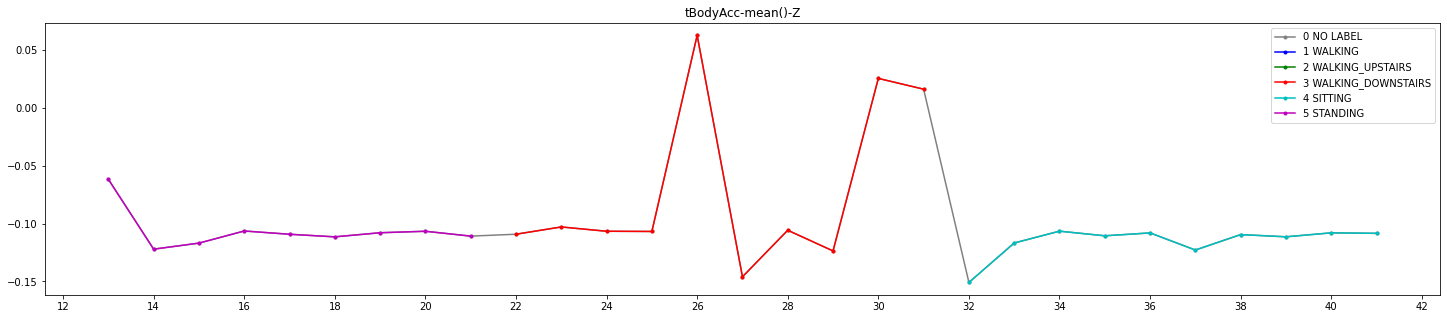

In [34]:
df = label_signal(data=train_df,
                 columns=['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z'],
                 start_point=23,
                 end_point=31,
                 label=3)